# Exploring MovieLens Dataset

This notebook is to explore some of the features of the MovieLens dataset.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

FULL_DATA = 'data/full-dataset/'

## Movies
First, let's take a look at the movies that are available.  We'll load the movie dataset as given (movies.csv) and take a look at it

In [2]:
movies = pd.read_csv(FULL_DATA+'movies.csv', index_col='movieId')
print(len(movies))
movies.head()

27278


,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


We can see there are 27,278 movies, each uniquely identified by a `movieId`.  We're given the title and a set of genres that each movie falls under.  If we want to use the genre information later, we'd probably want to list each possible genre as a separate column and have a flag if that genre applies to the particular movie.  We've done this processing and saved it as `processed/movies_unflattened.csv`.

In [3]:
movies = pd.read_csv('processed/movies_unflattened.csv', index_col='movieId')
movies.head()

,title,Drama,Thriller,Film-Noir,Adventure,War,Musical,Animation,Romance,Children,...,Comedy,Sci-Fi,Horror,Action,Crime,Mystery,IMAX,Western,Fantasy,Documentary
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,Jumanji (1995),0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,Grumpier Old Men (1995),0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


We can verify that the flags for a particular movie are correct.  Toy Story had Adventure, Animation, Children, Comedy, and Fantasy flagged

In [4]:
movies.loc[1]

title                 Toy Story (1995)
Drama                                0
Thriller                             0
Film-Noir                            0
Adventure                            1
War                                  0
Musical                              0
Animation                            1
Romance                              0
Children                             1
(no genres listed)                   0
Comedy                               1
Sci-Fi                               0
Horror                               0
Action                               0
Crime                                0
Mystery                              0
IMAX                                 0
Western                              0
Fantasy                              1
Documentary                          0
Name: 1, dtype: object

We see that these are the flags that are applied.  Notice we used `movies.loc[1]` to get to Toy Story.  This is because Toy Storie's `movieId` is 1, and is used as the key in the `pandas` dataframe.

Note: using the `flat=False` flag unfolded the movie genres pretty quickly.  This is because the function simply loaded a pre-computed version of the table from `processed/movies_unflattened.pkl`.  The code used to generate this is in `utils.py` under `load_movies()` if one is interested in how this was made.

## Ratings (basics)

Here's the meat of the dataset.  We'll now load the full ratings dataset, as given (ratings.csv).

In [5]:
ratings = pd.read_csv(FULL_DATA+'ratings.csv')
print(len(ratings))
ratings.head()

20000263


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


This file contains 20,000,263 instances where a user (userId) rated a movie (movieId) with a particular rating on a scale from 0.5-5, with steps of 0.5, and includes a timestamp of the event (defined in seconds from midnight on January 1, 1970 UTC).

We can easily check to see how many unique users there are (the userIds are unique)

In [6]:
len(np.unique(ratings.userId.values))

138493

We see there are 138,493 unique userIds, and it looks like the highest userId might also be that number.  We can verify that the userIds are just incremented fairly easily

In [7]:
increment = np.arange(1,138493+1,1)
unique = np.unique(ratings.userId.values)
sum(increment == unique) == len(unique)

True

Let's take a look at one movie in particular, and for the sake of simplicity we'll consider Toy Story (`movieId = 1`). We can take a look at all the ratings for just Toy Story

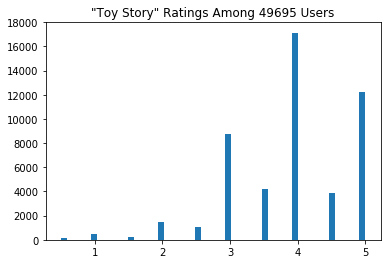

In [8]:
ts = ratings[ratings.movieId == 1]
plt.title('"Toy Story" Ratings Among '+str(len(ts))+" Users")
plt.hist(ts.rating, bins=50);

We can see Toy Story was rated fairly highly among all 49,695 raters.  We can take a look at the total number of ratings and the average rating for each movie.  We pre-computed this value so we'll just load this from `processed/movies_withstats.csv`

In [9]:
movies = pd.read_csv('processed/movies_withstats.csv', index_col='movieId')
movies.head()

,title,Drama,Thriller,Film-Noir,Adventure,War,Musical,Animation,Romance,Children,...,Horror,Action,Crime,Mystery,IMAX,Western,Fantasy,Documentary,n_ratings,avg_rating
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,49695,3.921240
2,Jumanji (1995),0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,22243,3.211977
3,Grumpier Old Men (1995),0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,12735,3.151040
4,Waiting to Exhale (1995),1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2756,2.861393
5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12161,3.064592


With this we can answer some basic questions, like which movie received the most ratings

In [10]:
movies.loc[movies['n_ratings'].idxmax()]

title                 Pulp Fiction (1994)
Drama                                   1
Thriller                                1
Film-Noir                               0
Adventure                               0
War                                     0
Musical                                 0
Animation                               0
Romance                                 0
Children                                0
(no genres listed)                      0
Comedy                                  1
Sci-Fi                                  0
Horror                                  0
Action                                  0
Crime                                   1
Mystery                                 0
IMAX                                    0
Western                                 0
Fantasy                                 0
Documentary                             0
n_ratings                           67310
avg_rating                        4.17423
Name: 296, dtype: object

We see this was Pulp Fiction with 67,310 ratings.  We can also see the highest rated film.  To remove films with a small number of ratings (e.g. 1 rating of 5 stars), we'll first slice the dataframe for films with greater than 2,000 ratings.

In [11]:
movies.loc[movies[movies.n_ratings > 2000]['avg_rating'].idxmax()]

title                 Shawshank Redemption, The (1994)
Drama                                                1
Thriller                                             0
Film-Noir                                            0
Adventure                                            0
War                                                  0
Musical                                              0
Animation                                            0
Romance                                              0
Children                                             0
(no genres listed)                                   0
Comedy                                               0
Sci-Fi                                               0
Horror                                               0
Action                                               0
Crime                                                1
Mystery                                              0
IMAX                                                 0
Western   

This is a classic, The Shawshank Redemption.  With 63,366 ratings it got a 4.45 on average (compare this to Pulp Fiction with 67,310 ratings but on average 4.17 stars).

## Genome tags

Released with the data set was a genome of machine-learning generated tags that can be applied to the movie.  Each tag (e.g. "zombie" or "slavery") is associated with a tagId and a relevance score for each movie on a scale from 0 to 1 (1 being the most relevant).  Let's take a look at the tags that are available.

In [12]:
tags = pd.read_csv(FULL_DATA+'genome-tags.csv')
tags.tail()

,tagId,tag
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie
1127,1128,zombies


The tags are applied to each movie, as shown below (this is the contents of genome-scores.csv)

In [13]:
genome = pd.read_csv(FULL_DATA+'genome-scores.csv')
genome.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


This maps each movieId to a tagId with the appropriate relevance score.  This would be more useful expanded as a matrix (movies vs. tags, with relevance scores populating the matrix).  This can be easily done using the `pivot_table` function from `pandas`

In [14]:
genome = genome.pivot_table(index='movieId',columns='tagId',values='relevance')
genome.head()

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
2,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
3,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
4,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.05750,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300
5,0.04200,0.05275,0.05925,0.03675,0.07525,0.12525,0.02850,0.08500,0.02950,0.02875,...,0.04250,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825


That's much better.  Now we can play similar games using normal `pandas` commands. Say we want to get a list of movies for which the tag "zombie" (tagId: 1127) applies fairly well (arbitrarily using a minimum relevance score of 0.5).

In [15]:
zombie_movies = genome[genome[1127] > 0.5]
len(zombie_movies)

180

We can sort the list by relevance score for "zombie," highest to lowest

In [16]:
zombie_sorted = zombie_movies.sort_values(1127, ascending=False)
zombie_sorted.head()

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
5210,0.03525,0.03300,0.02375,0.04100,0.10250,0.0295,0.02850,0.13925,0.13475,0.01750,...,0.02275,0.01225,0.01575,0.04900,0.18550,0.02800,0.04550,0.00475,0.99475,0.99425
5413,0.01650,0.01675,0.01350,0.01675,0.03075,0.0165,0.01725,0.07575,0.15025,0.02075,...,0.01125,0.00725,0.01700,0.03600,0.13075,0.01250,0.01075,0.00400,0.99300,0.99175
75425,0.03000,0.02675,0.02925,0.03725,0.08200,0.0500,0.04450,0.07425,0.03200,0.05400,...,0.04075,0.02050,0.01400,0.02625,0.25850,0.05275,0.02125,0.00625,0.98600,0.98250
4532,0.03675,0.04150,0.02525,0.03200,0.06425,0.0535,0.02650,0.09125,0.11275,0.03100,...,0.02225,0.01950,0.01750,0.04075,0.21200,0.02525,0.02850,0.00750,0.98600,0.97975
33834,0.02725,0.02300,0.03700,0.04075,0.05725,0.0405,0.02350,0.08150,0.04900,0.03250,...,0.03575,0.02300,0.01750,0.03300,0.17125,0.06825,0.03475,0.00725,0.98500,0.99150


We can see it looks like "zombie" and "zombies" relevance scores (1127 and 1128, respectively) tend to be similar, which makes sense.

We can even see what movie titles are associated with these movieIds, since the IDs are uniform across the dataset.

In [17]:
movies['title'][zombie_sorted.index.values]

movieId
5210      Burial Ground (a.k.a. Zombie Horror) (a.k.a. Z...
5413      Zombie Holocaust (a.k.a. Doctor Butcher M.D.) ...
75425                           Survival of the Dead (2009)
4532               Return of the Living Dead Part II (1988)
33834                               Land of the Dead (2005)
6731                                 Day of the Dead (1985)
1241                          Dead Alive (Braindead) (1992)
4533                  Return of the Living Dead, The (1985)
5165      Zombie (a.k.a. Zombie 2: The Dead Are Among Us...
55232                      Resident Evil: Extinction (2007)
71535                                     Zombieland (2009)
8578                                          Undead (2003)
7881                                    White Zombie (1932)
7360                                Dawn of the Dead (2004)
106030                        Last Days on Mars, The (2013)
8861                       Resident Evil: Apocalypse (2004)
735              Cemetery Man (D

You can definitely see a trend in likelihood that the movie involves zombies, even just based on the sorted list of titles.

The basic goal of our project, creating a recommendation engine based on collaborative filtering between reviews, won't use the genome tags.  However, for an extension it might be interesting to see how well our collaborative filtering agrees with just suggesting movies with similar genome relevance scores for movies that a user has rated highly.

## Other data

The MovieLens dataset also includes links between different labeling systems for movies, as well as user-generated tags for different movies.  Let's take a quick look at both

In [18]:
links = pd.read_csv(FULL_DATA+'links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


This links the movieId to its ID on the Internet Movie Database (IMDB), as well as its ID for The Movie Database (TMDB).  This is not useful in any immediate way for our project.

In [19]:
usertags = pd.read_csv(FULL_DATA+'tags.csv')
usertags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [20]:
usertags.tail()

,userId,movieId,tag,timestamp
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772
465563,138472,923,rise to power,1194037967


These tags are user-generated, so they are not a unique list, many are applied from a single user to the same movie, and are not consistently applied across movies.  As such, they are also not going to be used for this project.